세 가지 예제인 영화 리뷰 예측, 토픽 분류, 주택 가격 회귀 모두 홀드아웃 데이터에서 모델의 성능이 몇 번의 에포크 후에 최고치에 다다랐다가 감소되기 시작했습니다. 즉, 모델이 금방 훈련 데이터에 과대적합되기 시작합니다. 과대적합은 모든 머신 러닝 문제에서 발생합니다. 머신 러닝을 마스터하려면 과대적합을 다루는 방법을 꼭 배워야 합니다.

머신 러닝의 근본적인 이슈는 최적화와 일반화 사이의 줄다리기입니다. 최적화는 가능한 훈련 데이터에서 최고의 성능을 얻으려고 모델을 조정하는 과정입니다(머신 러닝의 학습). 반면 일반화는 훈련된 모델이 이전에 본 적 없는 데이터에서 얼마나 잘 수행되는지를 의미합니다. 물론 모델을 만드는 목적은 좋은 일반화 성능을 얻는 것입니다. 하지만 일반화 성능을 제어할 방법이 없습니다. 단지 훈련 데이터를 기반으로 모델을 조정할 수만 있습니다.

과대적합 해결
- 더 많은 훈련 데이터
- 정보의 양을 조절하거나 저장할 수 있는 정보에 제약
- 파리미터 수가 적은 모델 선택(단순한 모델)
- 훈련 데이터의 특성 수 축소
- 모델의 제약(특정 파라미터가 큰 값을 가지지 못하도록 함
- 훈련데이터의 잡음을 줄인다(오류데이터 수정하고 이상치 제거)

과소적합 해결
- 더 복잡한 모델 선택
- 훈련데이터의 특성을 더 선택
- 모델의 제약을 줄인다.


In [2]:
# num_words=10000은 훈련 데이터에서 가장 자주 나타나는 단어 10000개만 사용한다는 의미
from keras.datasets import imdb
import warnings
warnings.filterwarnings('ignore')
(train_data,train_labels),(test_data,test_labels) = imdb.load_data(num_words=10000)

17473536/17464789 [==============================] - 0s 0us/step


In [3]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i,sequence] = 1. # results[i]에서 sequence3가 있는 특정 인덱스의 위치를 1로 만든다.
  return results

# 훈련 데이터를 벡터로 변환
x_train = vectorize_sequences(train_data)
# 테스트 데이터를 벡터로 변환
x_test = vectorize_sequences(test_data)

# 레이블을 벡터로 바꾸어 준다.
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [4]:
# 신경망 모델 만들기
from tensorflow.keras import models, layers

model = models.Sequential()
model.add(layers.Dense(16,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

In [5]:
# 모델 컴파일
model.compile(optimizer='rmsprop',
              loss = 'binary_crossentropy',
              metrics=['accuracy'])

In [6]:
# 훈련 검증
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [7]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val,y_val))

Epoch 1/20
30/30 [==============================] - 2s 45ms/step - loss: 0.5007 - accuracy: 0.7774 - val_loss: 0.4102 - val_accuracy: 0.8281
Epoch 2/20
30/30 [==============================] - 1s 33ms/step - loss: 0.2869 - accuracy: 0.9011 - val_loss: 0.2943 - val_accuracy: 0.8875
Epoch 3/20
30/30 [==============================] - 1s 32ms/step - loss: 0.2136 - accuracy: 0.9279 - val_loss: 0.2780 - val_accuracy: 0.8900
Epoch 4/20
30/30 [==============================] - 1s 32ms/step - loss: 0.1664 - accuracy: 0.9441 - val_loss: 0.2803 - val_accuracy: 0.8856
Epoch 5/20
30/30 [==============================] - 1s 32ms/step - loss: 0.1388 - accuracy: 0.9528 - val_loss: 0.3227 - val_accuracy: 0.8726
Epoch 6/20
30/30 [==============================] - 1s 32ms/step - loss: 0.1103 - accuracy: 0.9667 - val_loss: 0.3053 - val_accuracy: 0.8839
Epoch 7/20
30/30 [==============================] - 1s 34ms/step - loss: 0.0921 - accuracy: 0.9717 - val_loss: 0.3295 - val_accuracy: 0.8811
Epoch 8/20
30

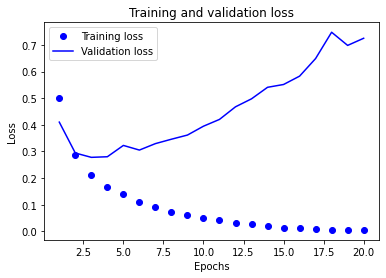

In [8]:
# 시각화
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(acc) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b',label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

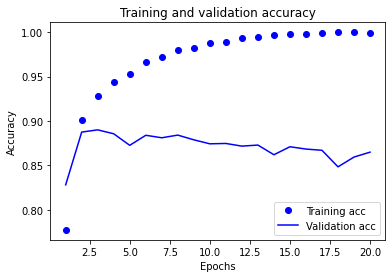

In [9]:
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b',label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

[과제] 상기 사례에 대하여 아래 사항을 수행하세요.
- 더 작은 네트워크로 변경해 그 효과를 설명 (출력 유닛 수 6)
- 더 큰 네트워크로 변경해 그 효과를 설명 (출력 유닛 수 1024)
- l2 규제를 추가하여 그 효과를 설명 